# Bernstein-Vazirani Algorithm

Let's say there is an oracle which contains a secret key of N bits and we are given a task of finding that secret key. Using quantum computing we can determine the secret key in a single computation only.

In [ ]:
# Run the below command to install Qiskit if you are running this program for the first time
!pip install qiskit

In [1]:
# Secret key which we want to determine
key = '101011'  
N = len(key)

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

In [3]:
qr = QuantumRegister(N+1)
cr = ClassicalRegister(N)
circuit = QuantumCircuit(qr,cr)

In [4]:
circuit.x(N) 
circuit.barrier()
circuit.h(range(N+1))
circuit.barrier()

In [5]:
for i in range(N):
    if key[i] == '1':
          circuit.cx(i, N) 
circuit.barrier()

In [6]:
circuit.h(range(N+1))
circuit.barrier()
for i in range(N):
    circuit.measure(N-1-i, i)

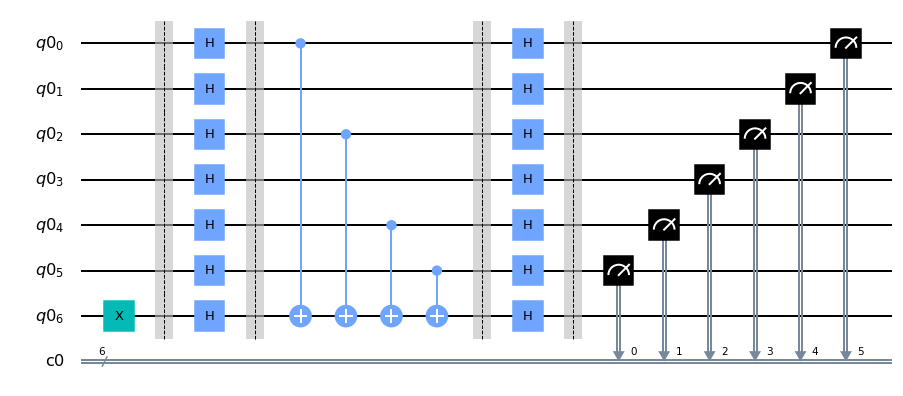

In [7]:
circuit.draw(output='mpl')

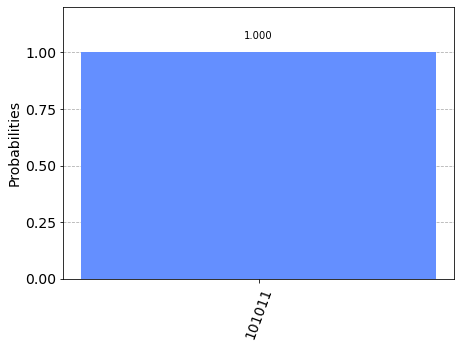

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
plot_histogram(result.get_counts(circuit))